### Analyzing the relation between COVID-19 and level of PM 2.5

Main module: Exploratory Data Analysis and Statistical Testing

UCLA DataFest 2020

Team R++: Kaixin Wang (UCLA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set() # set the style of the plots
sns.set_style("whitegrid")

# Part I: # COVID-19 Cases in different regions

Read in two datasets from CSSE of JHU (global). The datasets are updated on a daily basis, starting from 01/22/2020.

In [3]:
data_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
data_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

Extract entries for China

In [4]:
data_china_confirmed = data_confirmed[data_confirmed["Country/Region"] == "China"]
data_china_deaths = data_deaths[data_deaths["Country/Region"] == "China"]

Read in two datasets from CSSE of JHU (U.S. only). The datasets are updated on a daily basis, starting from 01/22/2020.

In [5]:
data_us_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
data_us_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
if "Population" in data_us_deaths:
    data_us_deaths = data_us_deaths.drop(columns = ["Population"])

Calculate the total number of confirmed cases and deaths in two countries

In [6]:
us_confirmed_total = np.sum(data_us_confirmed.iloc[:, 11:])
us_deaths_total = np.sum(data_us_deaths.iloc[:, 11:])

In [7]:
china_confirmed_total = np.sum(data_china_confirmed.iloc[:, 4:])
china_deaths_total = np.sum(data_china_deaths.iloc[:, 4:])

Calculate # COVID-19 cases in Beijing, Shanghai and Hubei

In [8]:
beijing_confirmed = data_china_confirmed[data_china_confirmed["Province/State"] == "Beijing"].iloc[:, 4:].transpose()
beijing_deaths = data_china_deaths[data_china_confirmed["Province/State"] == "Beijing"].iloc[:, 4:].transpose()

In [9]:
shanghai_confirmed = data_china_confirmed[data_china_confirmed["Province/State"] == "Shanghai"].iloc[:, 4:].transpose()
shanghai_deaths = data_china_deaths[data_china_confirmed["Province/State"] == "Shanghai"].iloc[:, 4:].transpose()

In [10]:
Hubei_confirmed = data_china_confirmed[data_china_confirmed["Province/State"] == "Hubei"].iloc[:, 4:].transpose()
Hubei_deaths = data_china_deaths[data_china_confirmed["Province/State"] == "Hubei"].iloc[:, 4:].transpose()

Calculate the # COVID-19 cases in New York, Los Angeles, and Santa Clara

In [11]:
NY_confirmed = data_us_confirmed[data_us_confirmed["Province_State"] == "New York"]
NY_deaths = data_us_deaths[data_us_deaths["Province_State"] == "New York"]

In [12]:
NY_confirmed = np.sum(NY_confirmed.iloc[:, 11:])
NY_deaths = np.sum(NY_deaths.iloc[:, 11:])

In [13]:
LA_confirmed = data_us_confirmed[data_us_confirmed["Admin2"] == "Los Angeles"]
Bay_confirmed = data_us_confirmed[data_us_confirmed["Admin2"] == "Santa Clara"]
LA_deaths = data_us_deaths[data_us_deaths["Admin2"] == "Los Angeles"]
Bay_deaths = data_us_deaths[data_us_deaths["Admin2"] == "Santa Clara"]

In [14]:
LA_confirmed = np.sum(LA_confirmed.iloc[:, 11:])
Bay_confirmed = np.sum(Bay_confirmed.iloc[:, 11:])
LA_deaths = np.sum(LA_deaths.iloc[:, 11:])
Bay_deaths = np.sum(Bay_deaths.iloc[:, 11:])

Visualize the # COVID-19 cases in all six cities

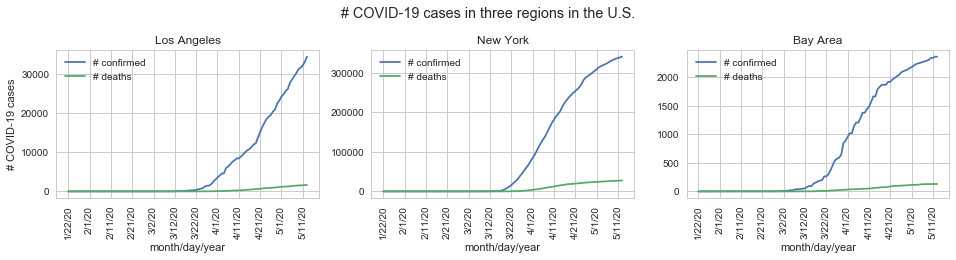

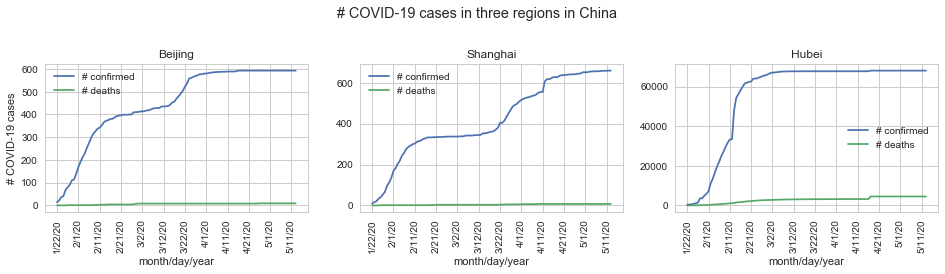

In [15]:
# Row 1: COVID-19 cases in the U.S.
days = LA_confirmed.shape[0]
ymax = max(max(LA_confirmed), max(NY_confirmed), max(Bay_confirmed))
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 1)
plt.plot(range(days), LA_confirmed, label = "# confirmed")
plt.plot(range(days), LA_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], LA_confirmed.index[::10], rotation = 90)
plt.ylabel("# COVID-19 cases")
plt.xlabel("month/day/year")
plt.legend()
plt.title("Los Angeles")
plt.subplot(2, 3, 2)
plt.plot(range(days), NY_confirmed, label = "# confirmed")
plt.plot(range(days), NY_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], LA_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("New York")
plt.subplot(2, 3, 3)
plt.plot(range(days), Bay_confirmed, label = "# confirmed")
plt.plot(range(days), Bay_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], LA_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("Bay Area")
plt.suptitle("# COVID-19 cases in three regions in the U.S.")
# Row 2: # COVID-19 cases in China
days = beijing_confirmed.shape[0]
ymax = max(max(beijing_confirmed), max(shanghai_confirmed), max(Hubei_confirmed))
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 4)
plt.plot(range(days), beijing_confirmed, label = "# confirmed")
plt.plot(range(days), beijing_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], beijing_confirmed.index[::10], rotation = 90)
plt.ylabel("# COVID-19 cases")
plt.xlabel("month/day/year")
plt.legend()
plt.title("Beijing")
plt.subplot(2, 3, 5)
plt.plot(range(days), shanghai_confirmed, label = "# confirmed")
plt.plot(range(days), shanghai_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], shanghai_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("Shanghai")
plt.subplot(2, 3, 6)
plt.plot(range(days), Hubei_confirmed, label = "# confirmed")
plt.plot(range(days), Hubei_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], Hubei_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("Hubei")
plt.suptitle("# COVID-19 cases in three regions in China", y = 0.6)
plt.show()

# Part II: Level of PM2.5 in different regions

Level of PM2.5 at three cities in the U.S. (2020)

In [16]:
LA_air = pd.read_csv("LA_Air.csv")
LA_air = LA_air[["Date", "Daily Mean PM2.5 Concentration"]]
LA_air = LA_air.groupby(["Date"], as_index = True).aggregate(np.mean)

In [17]:
NY_air = pd.read_csv("NY_Air.csv")
NY_air = NY_air[["Date", "Daily Mean PM2.5 Concentration"]]
NY_air = NY_air.groupby(["Date"], as_index = True).aggregate(np.mean)

In [18]:
Bay_air = pd.read_csv("Bay_Air.csv")
Bay_air = Bay_air[["Date", "Daily Mean PM2.5 Concentration"]]
Bay_air = Bay_air.groupby(["Date"], as_index = True).aggregate(np.mean)

Level of PM2.5 at three cities in the U.S. (2019)

In [19]:
LA_2019 = pd.read_csv("LA_Air_2019.csv")
NY_2019 = pd.read_csv("NY_Air_2019.csv")
Bay_2019 = pd.read_csv("Bay_Air_2019.csv")

In [20]:
LA_2019 = LA_2019[["Date", "Daily Mean PM2.5 Concentration"]].groupby(["Date"], as_index = True).aggregate(np.mean)
NY_2019 = NY_2019[["Date", "Daily Mean PM2.5 Concentration"]].groupby(["Date"], as_index = True).aggregate(np.mean)
Bay_2019 = Bay_2019[["Date", "Daily Mean PM2.5 Concentration"]].groupby(["Date"], as_index = True).aggregate(np.mean)

In [21]:
from datetime import datetime

In [22]:
dates = pd.date_range(start="20200101", end="20200501").tolist()
dates = [str(day.date()) for day in dates]
dates = [datetime.strptime(day, '%Y-%m-%d').strftime('%m/%d') for day in dates]

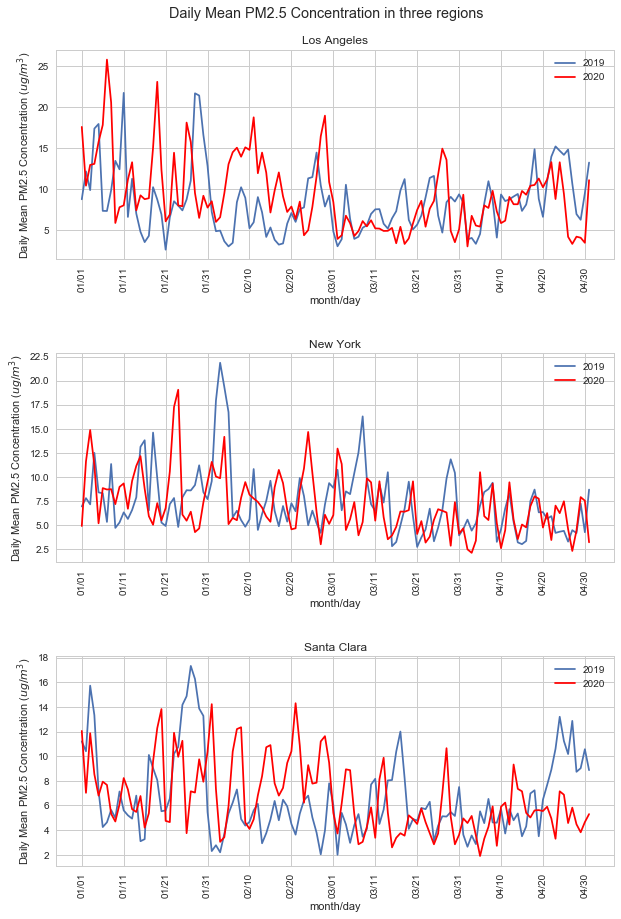

In [23]:
days = (LA_air.shape[0])
plt.figure(figsize = (10, 15))
plt.subplots_adjust(hspace = 0.45)
plt.subplot(3, 1, 1)
plt.plot(range(days)[:days], LA_2019["Daily Mean PM2.5 Concentration"][:days], label = "2019")
plt.plot(range(days)[:days], LA_air["Daily Mean PM2.5 Concentration"][:days], label = "2020", color = "red")
plt.xticks(range(days)[:days][::10], dates[:days][::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day")
plt.legend()
plt.title("Los Angeles")
plt.subplot(3, 1, 2)
plt.plot(range(days)[:days], NY_2019["Daily Mean PM2.5 Concentration"][:days], label = "2019")
plt.plot(range(days)[:days], NY_air["Daily Mean PM2.5 Concentration"][:days], label = "2020", color = "red")
plt.xticks(range(days)[:days][::10], dates[:days][::10], rotation = 90)
plt.xlabel("month/day")
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.title("New York")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(range(days)[:days], Bay_2019["Daily Mean PM2.5 Concentration"][:days], label = "2019")
plt.plot(range(days)[:days], Bay_air["Daily Mean PM2.5 Concentration"][:days], label = "2020", color = "red")
plt.xticks(range(days)[:days][::10], dates[:days][::10], rotation = 90)
plt.xlabel("month/day")
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.legend()
plt.title("Santa Clara")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions", y = 0.92)
plt.show()

Visualization of the level of PM2.5 in 2019 and 2020, comparing with the spread of COVID-19

In [24]:
year2020 = LA_air.shape[0]

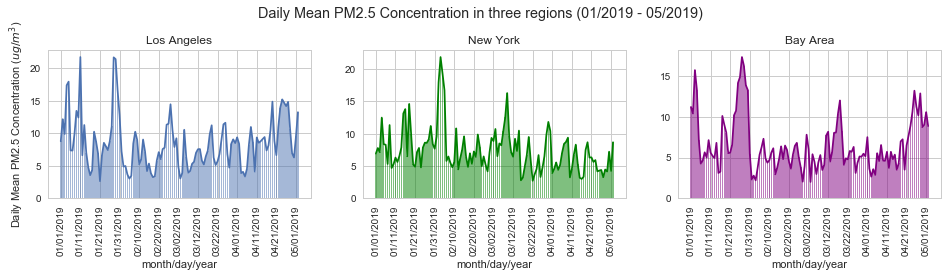

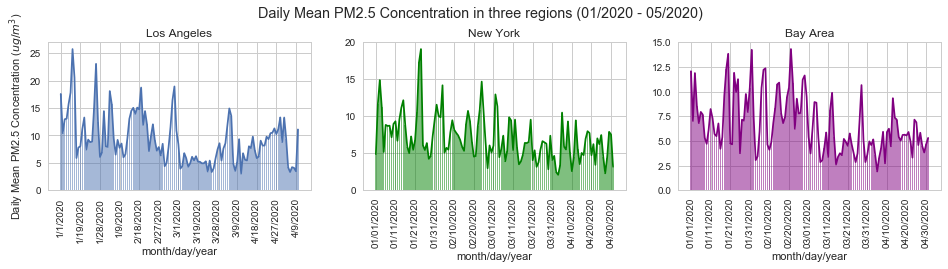

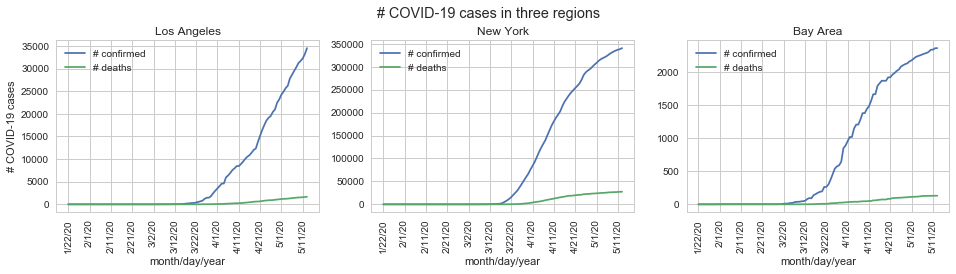

In [25]:
days = year2020
# Row 1: Level of PM2.5 from 01/2019-05/2019
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 1)
plt.bar(range(days)[:days], LA_2019["Daily Mean PM2.5 Concentration"][:days], label = "Los Angeles", alpha = 0.5)
plt.plot(range(days)[:days], LA_2019["Daily Mean PM2.5 Concentration"][:days], label = "Los Angeles")
plt.xticks(range(days)[:days][::10], LA_2019[:days].index[::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day/year")
plt.title("Los Angeles")
plt.subplot(2, 3, 2)
plt.bar(range(days)[:days], NY_2019[:days]["Daily Mean PM2.5 Concentration"], label = "New York", alpha = 0.5, color = "green")
plt.plot(range(days)[:days], NY_2019[:days]["Daily Mean PM2.5 Concentration"], label = "New York", color = "green")
plt.xticks(range(days)[:days][::10], NY_2019[:days].index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("New York")
plt.subplot(2, 3, 3)
plt.bar(range(days)[:days], Bay_2019[:days]["Daily Mean PM2.5 Concentration"], label = "Bay Area", alpha = 0.5, color = "purple")
plt.plot(range(days)[:days], Bay_2019[:days]["Daily Mean PM2.5 Concentration"], label = "Bay Area", color = "purple")
plt.xticks(range(days)[:days][::10], Bay_2019[:days].index[::10], rotation = 90)
plt.title("Bay Area")
plt.xlabel("month/day/year")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions (01/2019 - 05/2019)")
# Row 2: Level of PM2.5 from 01/2020- 05/2020
days = LA_air.shape[0]
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 4)
plt.bar(range(days), LA_air["Daily Mean PM2.5 Concentration"], label = "Los Angeles", alpha = 0.5)
plt.plot(range(days), LA_air["Daily Mean PM2.5 Concentration"], label = "Los Angeles")
plt.xticks(range(days+1)[::10], LA_air.index[::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day/year")
plt.title("Los Angeles")
plt.subplot(2, 3, 5)
plt.bar(range(days), NY_air["Daily Mean PM2.5 Concentration"], label = "New York", alpha = 0.5, color = "green")
plt.plot(range(days), NY_air["Daily Mean PM2.5 Concentration"], label = "New York", color = "green")
plt.xticks(range(days+1)[::10], NY_air.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("New York")
plt.subplot(2, 3, 6)
plt.bar(range(days), Bay_air["Daily Mean PM2.5 Concentration"], label = "Bay Area", alpha = 0.5, color = "purple")
plt.plot(range(days), Bay_air["Daily Mean PM2.5 Concentration"], label = "Bay Area", color = "purple")
plt.xticks(range(days+1)[::10], Bay_air.index[::10], rotation = 90)
plt.title("Bay Area")
plt.xlabel("month/day/year")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions (01/2020 - 05/2020)", y = 0.55)
plt.show()
# Row 3: COVID-19 cases
days = LA_confirmed.shape[0]
ymax = max(max(LA_confirmed), max(NY_confirmed), max(Bay_confirmed))
plt.figure(figsize = (16, 6))
plt.subplots_adjust(top = 1)
plt.subplot(2, 3, 4)
plt.plot(range(days), LA_confirmed, label = "# confirmed")
plt.plot(range(days), LA_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], LA_confirmed.index[::10], rotation = 90)
plt.ylabel("# COVID-19 cases")
plt.xlabel("month/day/year")
plt.legend()
plt.title("Los Angeles")
plt.subplot(2, 3, 5)
plt.plot(range(days), NY_confirmed, label = "# confirmed")
plt.plot(range(days), NY_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], LA_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("New York")
plt.subplot(2, 3, 6)
plt.plot(range(days), Bay_confirmed, label = "# confirmed")
plt.plot(range(days), Bay_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], LA_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("Bay Area")
plt.suptitle("# COVID-19 cases in three regions", y = 0.6)
plt.show()

Level of PM2.5 at three cities in China (2019)

In [26]:
df_2019 = pd.read_csv("Cities_China_PM2.5_2019.csv")
df_2020 = pd.read_csv("Cities_China_PM2.5_2020.csv")

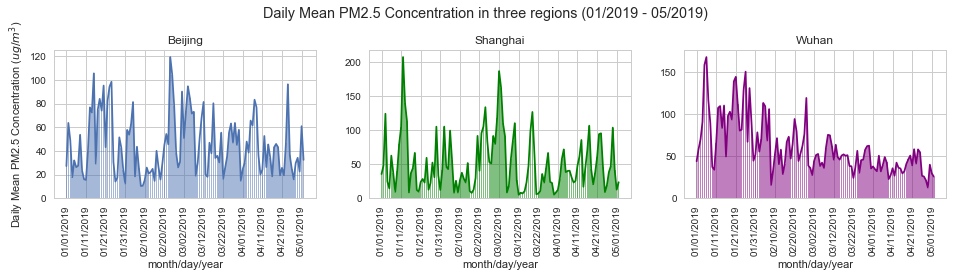

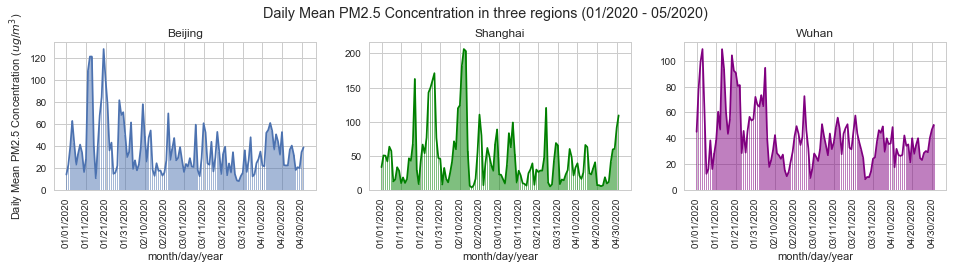

In [27]:
days = len(df_2020.Dates)
# row 1: year 2019
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 1)
plt.bar(range(days)[:days], df_2019["Beijing"][:days], label = "Beijing", alpha = 0.5)
plt.plot(range(days)[:days], df_2019["Beijing"][:days], label = "Beijing")
plt.xticks(range(days)[:days][::10], df_2019.Dates[:days][::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day/year")
plt.title("Beijing")
plt.subplot(2, 3, 2)
plt.bar(range(days)[:days], df_2019["Shanghai"][:days], label = "Shanghai", alpha = 0.5, color = "green")
plt.plot(range(days)[:days], df_2019["Shanghai"][:days], label = "Shanghai", color = "green")
plt.xticks(range(days)[:days][::10], df_2019.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Shanghai")
plt.subplot(2, 3, 3)
plt.bar(range(days)[:days], df_2019["Wuhan"][:days], label = "Wuhan", alpha = 0.5, color = "purple")
plt.plot(range(days)[:days], df_2019["Wuhan"][:days], label = "Wuhan", color = "purple")
plt.xticks(range(days)[:days][::10], df_2019.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Wuhan")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions (01/2019 - 05/2019)")
# row 2: year 2020
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 4)
plt.bar(range(days)[:days], df_2020["Beijing"][:days], label = "Beijing", alpha = 0.5)
plt.plot(range(days)[:days], df_2020["Beijing"][:days], label = "Beijing")
plt.xticks(range(days)[:days][::10], df_2020.Dates[:days][::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day/year")
plt.title("Beijing")
plt.subplot(2, 3, 5)
plt.bar(range(days)[:days], df_2020["Shanghai"][:days], label = "Shanghai", alpha = 0.5, color = "green")
plt.plot(range(days)[:days], df_2020["Shanghai"][:days], label = "Shanghai", color = "green")
plt.xticks(range(days)[:days][::10], df_2020.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Shanghai")
plt.subplot(2, 3, 6)
plt.bar(range(days)[:days], df_2020["Wuhan"][:days], label = "Wuhan", alpha = 0.5, color = "purple")
plt.plot(range(days)[:days], df_2020["Wuhan"][:days], label = "Wuhan", color = "purple")
plt.xticks(range(days)[:days][::10], df_2020.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Wuhan")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions (01/2020 - 05/2020)", y = 0.55)
plt.show()

In [28]:
dates = pd.date_range(start="20200101", end="20200501").tolist()
dates = [str(day.date()) for day in dates]
dates = [datetime.strptime(day, '%Y-%m-%d').strftime('%m/%d') for day in dates]

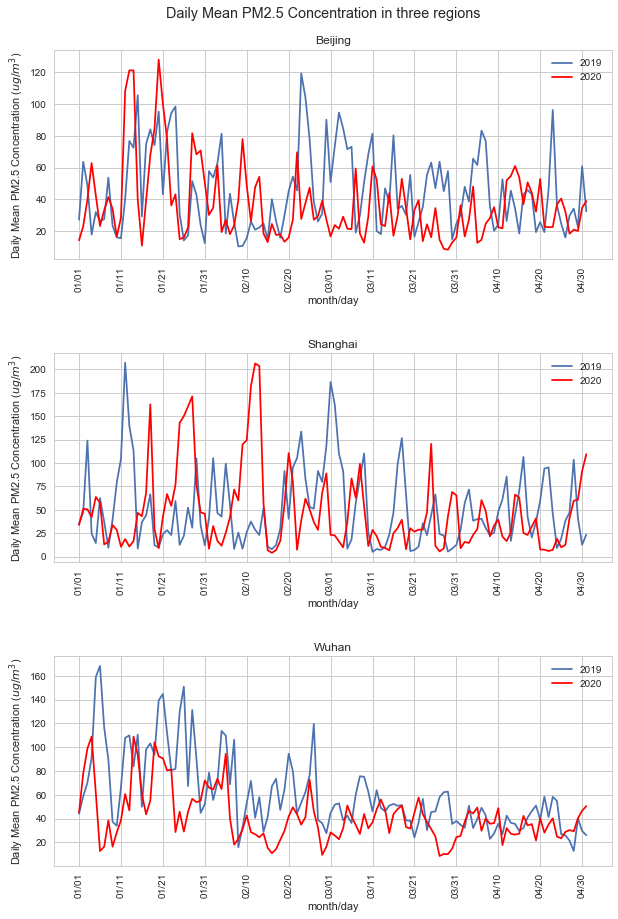

In [29]:
days = len(df_2020.Dates)
plt.figure(figsize = (10, 15))
plt.subplots_adjust(hspace = 0.45)
plt.subplot(3, 1, 1)
plt.plot(range(days)[:days], df_2019["Beijing"][:days], label = "2019")
plt.plot(range(days)[:days], df_2020["Beijing"][:days], label = "2020", color = "red")
plt.xticks(range(days)[:days][::10], dates[:days][::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day")
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.legend()
plt.title("Beijing")
plt.subplot(3, 1, 2)
plt.plot(range(days)[:days], df_2019["Shanghai"][:days], label = "2019")
plt.plot(range(days)[:days], df_2020["Shanghai"][:days], label = "2020", color = "red")
plt.xticks(range(days)[:days][::10], dates[:days][::10], rotation = 90)
plt.xlabel("month/day")
plt.title("Shanghai")
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(range(days)[:days], df_2019["Wuhan"][:days], label = "2019")
plt.plot(range(days)[:days], df_2020["Wuhan"][:days], label = "2020", color = "red")
plt.xticks(range(days)[:days][::10], dates[:days][::10], rotation = 90)
plt.xlabel("month/day")
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.legend()
plt.title("Wuhan")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions", y = 0.92)
plt.show()

Visualization of the level of PM2.5 in 2019 and 2020, comparing with the spread of COVID-19

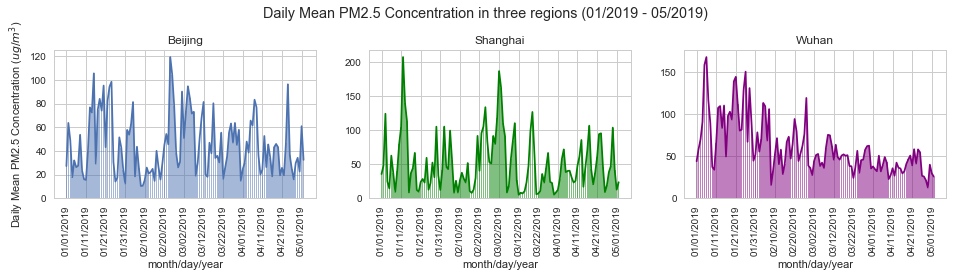

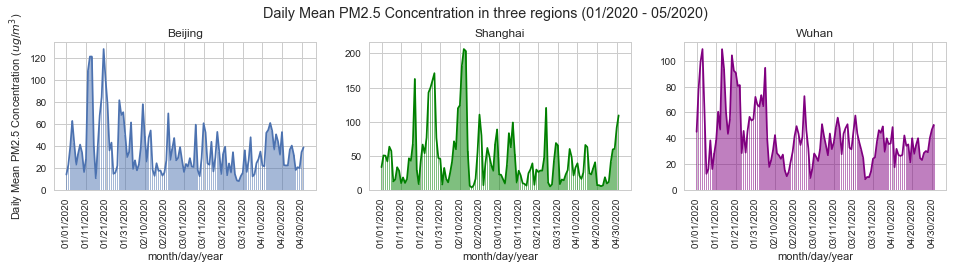

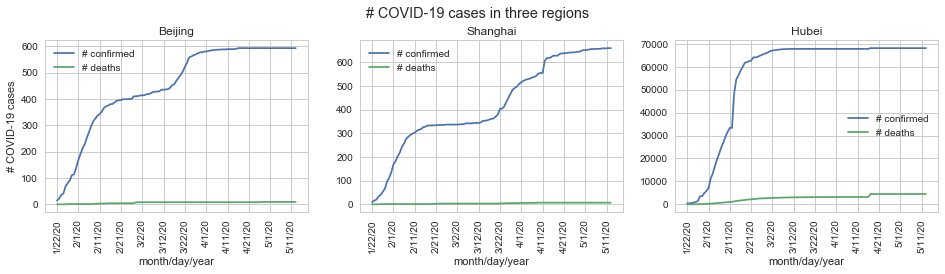

In [30]:
days = len(df_2020.Dates)
# Row 1: Level of PM2.5 from 01/2019-05/2019
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 1)
plt.bar(range(days)[:days], df_2019["Beijing"][:days], label = "Beijing", alpha = 0.5)
plt.plot(range(days)[:days], df_2019["Beijing"][:days], label = "Beijing")
plt.xticks(range(days)[:days][::10], df_2019.Dates[:days][::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day/year")
plt.title("Beijing")
plt.subplot(2, 3, 2)
plt.bar(range(days)[:days], df_2019["Shanghai"][:days], label = "Shanghai", alpha = 0.5, color = "green")
plt.plot(range(days)[:days], df_2019["Shanghai"][:days], label = "Shanghai", color = "green")
plt.xticks(range(days)[:days][::10], df_2019.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Shanghai")
plt.subplot(2, 3, 3)
plt.bar(range(days)[:days], df_2019["Wuhan"][:days], label = "Wuhan", alpha = 0.5, color = "purple")
plt.plot(range(days)[:days], df_2019["Wuhan"][:days], label = "Wuhan", color = "purple")
plt.xticks(range(days)[:days][::10], df_2019.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Wuhan")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions (01/2019 - 05/2019)")
# Row 2: Level of PM2.5 from 01/2020-05/2020
plt.figure(figsize = (16, 6))
plt.subplot(2, 3, 4)
plt.bar(range(days)[:days], df_2020["Beijing"][:days], label = "Beijing", alpha = 0.5)
plt.plot(range(days)[:days], df_2020["Beijing"][:days], label = "Beijing")
plt.xticks(range(days)[:days][::10], df_2020.Dates[:days][::10], rotation = 90)
plt.ylabel("Daily Mean PM2.5 Concentration ($ug/m^3$)")
plt.xlabel("month/day/year")
plt.title("Beijing")
plt.subplot(2, 3, 5)
plt.bar(range(days)[:days], df_2020["Shanghai"][:days], label = "Shanghai", alpha = 0.5, color = "green")
plt.plot(range(days)[:days], df_2020["Shanghai"][:days], label = "Shanghai", color = "green")
plt.xticks(range(days)[:days][::10], df_2020.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Shanghai")
plt.subplot(2, 3, 6)
plt.bar(range(days)[:days], df_2020["Wuhan"][:days], label = "Wuhan", alpha = 0.5, color = "purple")
plt.plot(range(days)[:days], df_2020["Wuhan"][:days], label = "Wuhan", color = "purple")
plt.xticks(range(days)[:days][::10], df_2020.Dates[:days][::10], rotation = 90)
plt.xlabel("month/day/year")
plt.title("Wuhan")
plt.suptitle("Daily Mean PM2.5 Concentration in three regions (01/2020 - 05/2020)", y = 0.55)
plt.show()
# Row 3: # COVID-19 cases 
days = beijing_confirmed.shape[0]
ymax = max(max(beijing_confirmed), max(shanghai_confirmed), max(Hubei_confirmed))
plt.figure(figsize = (16, 6))
plt.subplots_adjust(top = 1)
plt.subplot(2, 3, 4)
plt.plot(range(days), beijing_confirmed, label = "# confirmed")
plt.plot(range(days), beijing_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], beijing_confirmed.index[::10], rotation = 90)
plt.ylabel("# COVID-19 cases")
plt.xlabel("month/day/year")
plt.legend()
plt.title("Beijing")
plt.subplot(2, 3, 5)
plt.plot(range(days), shanghai_confirmed, label = "# confirmed")
plt.plot(range(days), shanghai_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], shanghai_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("Shanghai")
plt.subplot(2, 3, 6)
plt.plot(range(days), Hubei_confirmed, label = "# confirmed")
plt.plot(range(days), Hubei_deaths, label = "# deaths")
plt.xticks(range(days+1)[::10], Hubei_confirmed.index[::10], rotation = 90)
plt.xlabel("month/day/year")
plt.legend()
plt.title("Hubei")
plt.suptitle("# COVID-19 cases in three regions", y = 0.6)
plt.show()

# Part III: `grangercausalitytests` tests

The null hypothesis ($H_0$) for `grangercausalitytests` is that the time series in the second column ($X_2$) of the dataframe does NOT Granger cause the time series in the first column ($X_1$). Grange causality means that past values of $X_2$ have a statistically significant effect on the current value of $X_1$, taking past values of $X_1$ into account as regressors. We reject the null hypothesis that $X_2$ does not Granger cause $X_1$ if the p-values are below a desired size of the test.

The null hypothesis ($H_0$) for all four test is that the coefficients corresponding to past values of the second time series are zero.

In [31]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

`grangercausalitytests` betwen level of PM2.5 and # confirmed COVID-19 cases:

- $X_1$: level of PM2.5 from 01/2020-05/2020 (target variable)
- $X_2$: # confirmed COVID-19 cases from 01/2019-05/2019 (predictor variable)

$H_0$: $X_2$ does not Granger-cause $X_1$.

Los Angeles, U.S.

In [32]:
days = LA_air[["Daily Mean PM2.5 Concentration"]][21:].shape[0]
air_LA = LA_air[["Daily Mean PM2.5 Concentration"]][21:]
cases_LA = pd.DataFrame(LA_confirmed[:days])

In [33]:
LA = pd.concat([air_LA.reset_index(drop = True), cases_LA.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
LA.columns = LA.columns.droplevel(1)

In [34]:
test_LA = grangercausalitytests(LA, 8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0460  , p=0.8306  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=0.0474  , p=0.8276  , df=1
likelihood ratio test: chi2=0.0474  , p=0.8276  , df=1
parameter F test:         F=0.0460  , p=0.8306  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2591  , p=0.7723  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=0.5457  , p=0.7612  , df=2
likelihood ratio test: chi2=0.5442  , p=0.7618  , df=2
parameter F test:         F=0.2591  , p=0.7723  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2126  , p=0.8874  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=0.6870  , p=0.8763  , df=3
likelihood ratio test: chi2=0.6846  , p=0.8768  , df=3
parameter F test:         F=0.2126  , p=0.8874  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8457  , p=0.5000  , df_d

New York, U.S.

In [35]:
days = NY_air[["Daily Mean PM2.5 Concentration"]][21:].shape[0]
air_NY = NY_air[["Daily Mean PM2.5 Concentration"]][21:]
cases_NY = pd.DataFrame(NY_confirmed[:days])

In [36]:
NY = pd.concat([air_NY.reset_index(drop = True), cases_NY.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
NY.columns = NY.columns.droplevel(1)

In [37]:
test_NY = grangercausalitytests(NY, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6393  , p=0.1075  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=2.7209  , p=0.0990  , df=1
likelihood ratio test: chi2=2.6846  , p=0.1013  , df=1
parameter F test:         F=2.6393  , p=0.1075  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8707  , p=0.0242  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=8.1532  , p=0.0170  , df=2
likelihood ratio test: chi2=7.8348  , p=0.0199  , df=2
parameter F test:         F=3.8707  , p=0.0242  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3850  , p=0.0215  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=10.9361 , p=0.0121  , df=3
likelihood ratio test: chi2=10.3678 , p=0.0157  , df=3
parameter F test:         F=3.3850  , p=0.0215  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1601  , p=0.0178  , df_d

Santa Clara, U.S.

In [38]:
days = Bay_air[["Daily Mean PM2.5 Concentration"]][21:].shape[0]
air_Bay = Bay_air[["Daily Mean PM2.5 Concentration"]][21:]
cases_Bay = pd.DataFrame(Bay_confirmed[:days])

In [39]:
Bay = pd.concat([air_Bay.reset_index(drop = True), cases_Bay.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
Bay.columns = Bay.columns.droplevel(1)

In [40]:
test_Bay = grangercausalitytests(Bay, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2532  , p=0.0744  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=3.3538  , p=0.0670  , df=1
likelihood ratio test: chi2=3.2988  , p=0.0693  , df=1
parameter F test:         F=3.2532  , p=0.0744  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2929  , p=0.0415  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=6.9361  , p=0.0312  , df=2
likelihood ratio test: chi2=6.7039  , p=0.0350  , df=2
parameter F test:         F=3.2929  , p=0.0415  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3009  , p=0.0825  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=7.4336  , p=0.0593  , df=3
likelihood ratio test: chi2=7.1652  , p=0.0668  , df=3
parameter F test:         F=2.3009  , p=0.0825  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1057  , p=0.3590  , df_d

Beijing, China

In [41]:
days = df_2020.Beijing[21:].shape[0]
air_beijing = df_2020[["Beijing"]][21:]
cases_beijing = beijing_confirmed[:days]

In [42]:
beijing = pd.concat([air_beijing.reset_index(drop = True), cases_beijing.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
beijing.columns = beijing.columns.droplevel(1)

In [43]:
test_beijing = grangercausalitytests(beijing, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4693  , p=0.2284  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=1.5147  , p=0.2184  , df=1
likelihood ratio test: chi2=1.5033  , p=0.2202  , df=1
parameter F test:         F=1.4693  , p=0.2284  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5615  , p=0.2152  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=3.2891  , p=0.1931  , df=2
likelihood ratio test: chi2=3.2356  , p=0.1983  , df=2
parameter F test:         F=1.5615  , p=0.2152  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7133  , p=0.1698  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=5.5352  , p=0.1366  , df=3
likelihood ratio test: chi2=5.3845  , p=0.1457  , df=3
parameter F test:         F=1.7133  , p=0.1698  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6362  , p=0.1723  , df_d

Shanghai, China

In [44]:
days = df_2020.Shanghai[21:].shape[0]
air_shanghai = df_2020[["Shanghai"]][21:]
cases_shanghai = shanghai_confirmed[:days]

In [45]:
shanghai = pd.concat([air_shanghai.reset_index(drop = True), cases_shanghai.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
shanghai.columns = shanghai.columns.droplevel(1)

In [46]:
test_shanghai = grangercausalitytests(shanghai, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2969  , p=0.2576  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=1.3370  , p=0.2476  , df=1
likelihood ratio test: chi2=1.3281  , p=0.2491  , df=1
parameter F test:         F=1.2969  , p=0.2576  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7166  , p=0.1853  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=3.6157  , p=0.1640  , df=2
likelihood ratio test: chi2=3.5513  , p=0.1694  , df=2
parameter F test:         F=1.7166  , p=0.1853  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3385  , p=0.2668  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=4.3244  , p=0.2285  , df=3
likelihood ratio test: chi2=4.2317  , p=0.2375  , df=3
parameter F test:         F=1.3385  , p=0.2668  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9348  , p=0.4477  , df_d

Wuhan, China

In [47]:
days = df_2020.Wuhan[21:].shape[0]
air_wuhan = df_2020[["Wuhan"]][21:]
cases_wuhan = Hubei_confirmed[:days]

In [48]:
wuhan = pd.concat([air_wuhan.reset_index(drop = True), cases_wuhan.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
wuhan.columns = wuhan.columns.droplevel(1)

In [49]:
test_wuhan = grangercausalitytests(wuhan, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0623  , p=0.0833  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=3.1570  , p=0.0756  , df=1
likelihood ratio test: chi2=3.1082  , p=0.0779  , df=1
parameter F test:         F=3.0623  , p=0.0833  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4581  , p=0.2379  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=3.0714  , p=0.2153  , df=2
likelihood ratio test: chi2=3.0247  , p=0.2204  , df=2
parameter F test:         F=1.4581  , p=0.2379  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9857  , p=0.0102  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=12.8770 , p=0.0049  , df=3
likelihood ratio test: chi2=12.0984 , p=0.0071  , df=3
parameter F test:         F=3.9857  , p=0.0102  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3440  , p=0.0609  , df_d

`grangercausalitytests` on PM2.5 time-series

- $X_1$: level of PM2.5 from 01/2020-05/2020 (target variable)
- $X_2$: level of PM2.5 from 01/2019-05/2019 (predictor variable)

$H_0$: $X_2$ does not Granger-cause $X_1$.

Los Angeles, U.S.

In [50]:
days = LA_air[["Daily Mean PM2.5 Concentration"]][21:].shape[0]
air_LA = LA_air[["Daily Mean PM2.5 Concentration"]][21:]
air_LA_19 = LA_2019[["Daily Mean PM2.5 Concentration"]][21:21+days]

In [51]:
LA = pd.concat([air_LA.reset_index(drop = True), air_LA_19.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
LA.columns = LA.columns.droplevel(1)

In [52]:
test_LA = grangercausalitytests(LA, 8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0233  , p=0.8791  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=0.0240  , p=0.8769  , df=1
likelihood ratio test: chi2=0.0240  , p=0.8770  , df=1
parameter F test:         F=0.0233  , p=0.8791  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0672  , p=0.9350  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=0.1417  , p=0.9316  , df=2
likelihood ratio test: chi2=0.1416  , p=0.9317  , df=2
parameter F test:         F=0.0672  , p=0.9350  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4122  , p=0.7446  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=1.3318  , p=0.7216  , df=3
likelihood ratio test: chi2=1.3228  , p=0.7237  , df=3
parameter F test:         F=0.4122  , p=0.7446  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3386  , p=0.8512  , df_d

New York, U.S.

In [53]:
days = NY_air[["Daily Mean PM2.5 Concentration"]][21:].shape[0]
air_NY = NY_air[["Daily Mean PM2.5 Concentration"]][21:]
air_NY_19 = NY_2019[["Daily Mean PM2.5 Concentration"]][21:21+days]

In [54]:
NY = pd.concat([air_NY.reset_index(drop = True), air_NY_19.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
NY.columns = NY.columns.droplevel(1)

In [55]:
test_NY = grangercausalitytests(NY, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8998  , p=0.0292  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=5.0514  , p=0.0246  , df=1
likelihood ratio test: chi2=4.9279  , p=0.0264  , df=1
parameter F test:         F=4.8998  , p=0.0292  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2132  , p=0.0177  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=8.8745  , p=0.0118  , df=2
likelihood ratio test: chi2=8.4990  , p=0.0143  , df=2
parameter F test:         F=4.2132  , p=0.0177  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5867  , p=0.0167  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=11.5877 , p=0.0089  , df=3
likelihood ratio test: chi2=10.9523 , p=0.0120  , df=3
parameter F test:         F=3.5867  , p=0.0167  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5796  , p=0.0427  , df_d

Santa Clara, U.S.

In [56]:
days = Bay_air[["Daily Mean PM2.5 Concentration"]][21:].shape[0]
air_Bay = Bay_air[["Daily Mean PM2.5 Concentration"]][21:]
air_Bay_19 = Bay_2019[["Daily Mean PM2.5 Concentration"]][21:21+days]

In [57]:
Bay = pd.concat([air_Bay.reset_index(drop = True), air_Bay_19.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
Bay.columns = Bay.columns.droplevel(1)

In [58]:
test_Bay = grangercausalitytests(Bay, 8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1694  , p=0.6816  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=0.1746  , p=0.6760  , df=1
likelihood ratio test: chi2=0.1745  , p=0.6762  , df=1
parameter F test:         F=0.1694  , p=0.6816  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7983  , p=0.4531  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=1.6816  , p=0.4314  , df=2
likelihood ratio test: chi2=1.6675  , p=0.4344  , df=2
parameter F test:         F=0.7983  , p=0.4531  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4945  , p=0.6870  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=1.5975  , p=0.6600  , df=3
likelihood ratio test: chi2=1.5846  , p=0.6629  , df=3
parameter F test:         F=0.4945  , p=0.6870  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4165  , p=0.7963  , df_d

Beijing, China

In [59]:
days = df_2020.Beijing[21:].shape[0]
air_beijing = df_2020[["Beijing"]][21:]
air_beijing_19 = df_2019[["Beijing"]][21:21+days]

In [60]:
beijing = pd.concat([air_beijing.reset_index(drop = True), air_beijing_19.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
beijing.columns = beijing.columns.droplevel(1)

In [61]:
test_beijing = grangercausalitytests(beijing, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1476  , p=0.7017  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=0.1522  , p=0.6964  , df=1
likelihood ratio test: chi2=0.1521  , p=0.6966  , df=1
parameter F test:         F=0.1476  , p=0.7017  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4960  , p=0.6105  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=1.0449  , p=0.5931  , df=2
likelihood ratio test: chi2=1.0394  , p=0.5947  , df=2
parameter F test:         F=0.4960  , p=0.6105  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8903  , p=0.1368  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=6.1072  , p=0.1065  , df=3
likelihood ratio test: chi2=5.9245  , p=0.1153  , df=3
parameter F test:         F=1.8903  , p=0.1368  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3738  , p=0.2496  , df_d

Shanghai, China

In [62]:
days = df_2020.Shanghai[21:].shape[0]
air_shanghai = df_2020[["Shanghai"]][21:]
air_shanghai_19 = df_2019[["Shanghai"]][21:21+days]

In [63]:
shanghai = pd.concat([air_shanghai.reset_index(drop = True), air_shanghai_19.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
shanghai.columns = shanghai.columns.droplevel(1)

In [64]:
test_shanghai = grangercausalitytests(shanghai, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6420  , p=0.2031  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=1.6927  , p=0.1932  , df=1
likelihood ratio test: chi2=1.6786  , p=0.1951  , df=1
parameter F test:         F=1.6420  , p=0.2031  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3946  , p=0.6750  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=0.8312  , p=0.6599  , df=2
likelihood ratio test: chi2=0.8278  , p=0.6611  , df=2
parameter F test:         F=0.3946  , p=0.6750  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6999  , p=0.5545  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=2.2612  , p=0.5200  , df=3
likelihood ratio test: chi2=2.2355  , p=0.5250  , df=3
parameter F test:         F=0.6999  , p=0.5545  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1362  , p=0.3448  , df_d

Wuhan, China

In [65]:
days = df_2020.Wuhan[21:].shape[0]
air_wuhan = df_2020[["Wuhan"]][21:]
air_wuhan_19 = df_2019[["Wuhan"]][21:21+days]

In [66]:
wuhan = pd.concat([air_wuhan.reset_index(drop = True), air_wuhan_19.reset_index(drop = True)], axis = 1, keys = ["COVID-19", "PM2.5"])
wuhan.columns = wuhan.columns.droplevel(1)

In [67]:
test_wuhan = grangercausalitytests(wuhan, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2498  , p=0.6183  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=0.2575  , p=0.6118  , df=1
likelihood ratio test: chi2=0.2572  , p=0.6121  , df=1
parameter F test:         F=0.2498  , p=0.6183  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2027  , p=0.8169  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=0.4269  , p=0.8078  , df=2
likelihood ratio test: chi2=0.4260  , p=0.8082  , df=2
parameter F test:         F=0.2027  , p=0.8169  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4883  , p=0.6912  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=1.5777  , p=0.6645  , df=3
likelihood ratio test: chi2=1.5651  , p=0.6673  , df=3
parameter F test:         F=0.4883  , p=0.6912  , df_denom=91, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8664  , p=0.4875  , df_d

# Part IV: Analysis

|Statistics | Beijing | Shanghai | Wuhan | Los Angeles | New York | Santa Clara |
|-----------| --------| ---------| ------| ------------| ---------|-------------|
|Number of Lags | 5 | 2 | 3 | 6 | 3 | 2 |
|ssr based F test | p=0.1163 | p=0.1853| p=0.0102 | p=0.2993 | p=0.0042 | p=0.0415 | 
|ssr based $\chi^2$ test | p=0.0668 | p=0.1640 | p=0.0049 | p=0.1775 | p=0.0008 | p=0.0312 | 
|likelihood ratio test | p=0.0812 | p=0.1694 | p=0.0071 | p=0.2072 | p=0.0019 |  p=0.0350 |
|parameter F test | p=0.1163 | p=0.1853 | p=0.0102 | p=0.2993 | p=0.0042 |  p=0.0415 |

From the results of `grangercausality`, we observe that:

- the spread of the pandemic *Granger-causes* the change in the level of PM2.5 in Wuhan, New York and Santa Clara
- the spread of the pandemic has similiar effects as the level of PM2.5 from 01/2019-05/2019 in predicting the PM2.5 level from 01/2020-05/2020 in Beijing, Shanghai and Los Angeles, indicating the spread of the pandemic is not a statistically significant predictor. 

# Part V: Future Steps

![Flowchart](flowchart.png)

As we proposed previously, we saw that the spread of the COVID-19 does have an impact on the level of PM2.5 in some of the cities that we sampled. However, we also know that the pandemic implicitly influences the air quality since self-quarantine leads to a decrease in the amount of public transportaion and industrial production activities.

Hence, the next step is to collect the data for public transportation (e.g., number of flights, trains, or buses per day) and industrial production (e.g., certain indices in industry, such as PMI), and further investigate their relations.

# References

1. Datasets of COVID-19 from CSSE at JHU: https://github.com/CSSEGISandData/COVID19/tree/master/csse_covid_19_data/csse_covid_19_time_series
2. Datasets of PM2.5 in the U.S. from USEPA: https://www.epa.gov/outdoor-air-quality-data/download-daily-data
3. Datasets for PM2.5 in China: https://quotsoft.net/air/
5. Documentation for using `grangercausalitytests`: https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html